# Xử lý ảnh

### **INT3404 1**   -----  7-9 Monday - 303GD2

## Diep Ng., Ph.D. 

Mail-to: ngocdiep at vnu.edu.vn

# Tuần 1: Làm quen với OpenCV: Đọc, hiển thị và lưu ảnh

In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
%pwd

'/Users/chupi/Documents/work/UET/2020/classes/ImageProcessing/Slides - DiepNg'

In [8]:
%cd ../code

/Users/chupi/Documents/work/UET/2020/classes/ImageProcessing/code


In [9]:
%ls

w1_read_display.py      xu_resized_16.jpg       xu_resized_64.jpg
xu.jpg                  xu_resized_256.jpg      xu_sketch.jpg
xu_resized512_gray.jpg  xu_resized_32.jpg
xu_resized_128.jpg      xu_resized_512.jpg


# Import libraries

In [10]:
#import libraries
import cv2

#to display at jupyter notebook
import matplotlib.pyplot as plt


In [11]:
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = [10, 8]

# Read and display image

In [13]:
iname = "xu.jpg"

In [14]:
#read image
image = cv2.imread(iname)

In [15]:
image

array([[[ 63,  89, 103],
        [ 70,  96, 110],
        [ 64,  90, 104],
        ...,
        [138, 163, 173],
        [140, 165, 175],
        [142, 167, 177]],

       [[ 64,  90, 104],
        [ 64,  90, 104],
        [ 58,  84,  98],
        ...,
        [140, 165, 175],
        [141, 166, 176],
        [142, 167, 177]],

       [[ 64,  90, 104],
        [ 61,  87, 101],
        [ 57,  83,  97],
        ...,
        [142, 167, 177],
        [142, 167, 177],
        [141, 166, 176]],

       ...,

       [[ 83, 110, 137],
        [ 83, 110, 137],
        [ 80, 107, 134],
        ...,
        [ 81, 107, 131],
        [ 80, 106, 130],
        [ 80, 104, 128]],

       [[ 84, 111, 138],
        [ 84, 111, 138],
        [ 80, 107, 134],
        ...,
        [ 82, 108, 132],
        [ 81, 107, 131],
        [ 82, 106, 130]],

       [[ 86, 113, 139],
        [ 85, 112, 138],
        [ 80, 107, 133],
        ...,
        [ 83, 109, 133],
        [ 83, 109, 133],
        [ 84, 108, 132]]

In [17]:
#size of image
image.shape

(2283, 1565, 3)

In [20]:
h, w, num_channels = image.shape   ##NOTE: height & width position

In [23]:
print("height: %d, width: %d, num_channels: %d" % (h,w,num_channels))

height: 2283, width: 1565, num_channels: 3


In [62]:
image.size

10718685

In [63]:
image.dtype

dtype('uint8')

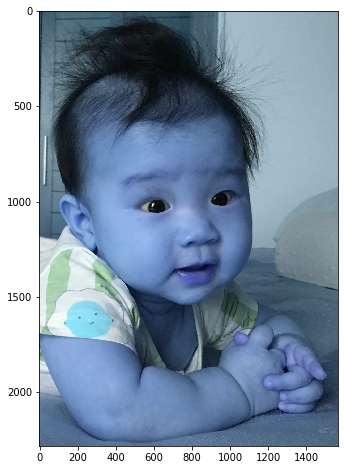

In [18]:
#Note cv2 read BGR as default
plt.imshow(image)

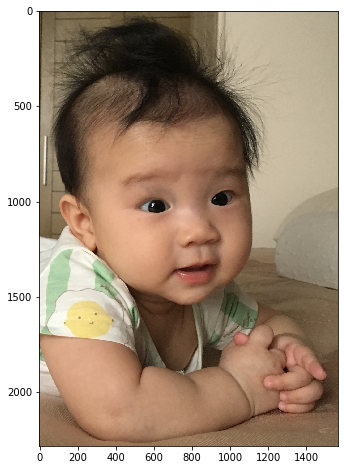

In [19]:
#display rgb image
plt.imshow(image[:,:,::-1])

## imread() with different color format
- IMREAD_ANYCOLOR=4
- IMREAD_ANYDEPTH = 2
- IMREAD_COLOR=1
- IMREAD_GRAYSCALE = 0
- IMREAD_LOAD_GDAL = 8
- IMREAD_UNCHANGED = -1

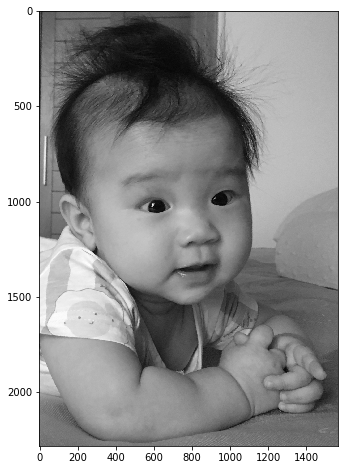

In [24]:
img = cv2.imread(iname, 0)
plt.imshow(img, cmap="gray")

## make a random image

In [30]:
import os
import numpy as np

In [43]:
#make an array of 120,000 random bytes
#since an image has 8bits per channel
#a byte is an integer ranging from 0 to 255
randomBytearray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomBytearray)

In [44]:
type(flatNumpyArray)

numpy.ndarray

In [45]:
flatNumpyArray.shape

(120000,)

In [46]:
flatNumpyArray[10:20]

array([ 50, 187, 209, 113, 114, 214,  23, 144,  47, 110], dtype=uint8)

In [47]:
np.max(flatNumpyArray)

255

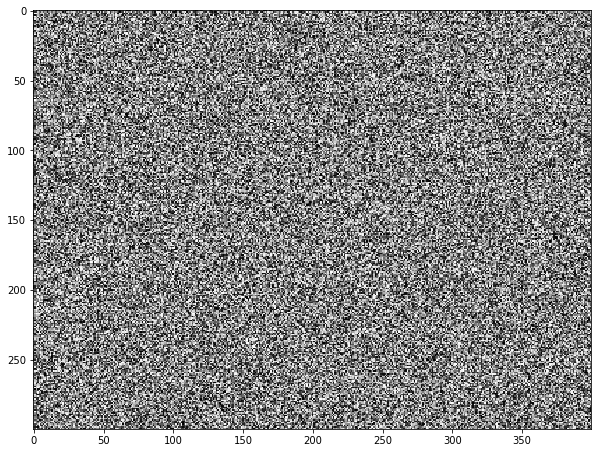

In [50]:
#convert the array to make a 400x300 grayscale image
grayImage = flatNumpyArray.reshape(300, 400)
plt.imshow(grayImage, cmap='gray')

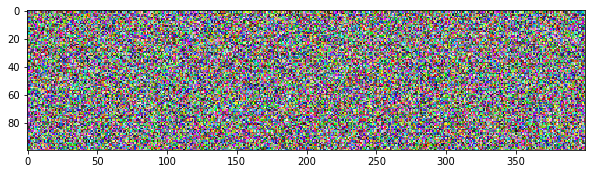

In [49]:
#conver the array to make a 400x100 color image
bgrImage = flatNumpyArray.reshape(100, 400, 3)
plt.imshow(bgrImage[:,:,::-1])

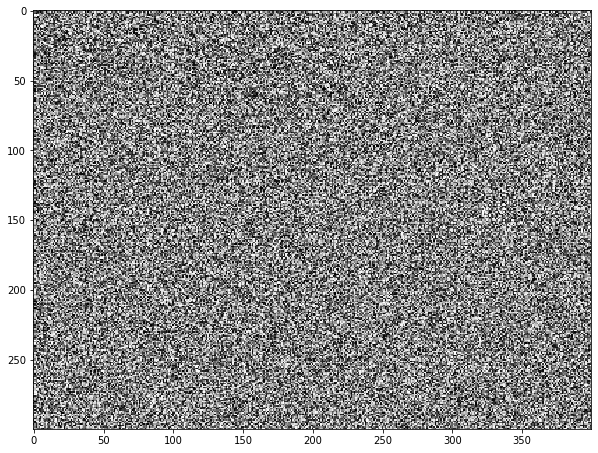

In [51]:
#another way
array = np.random.randint(0, 256, 120000)
grayImage = array.reshape(300, 400)
plt.imshow(grayImage, cmap='gray')

# Accessing image data with numpy.array 

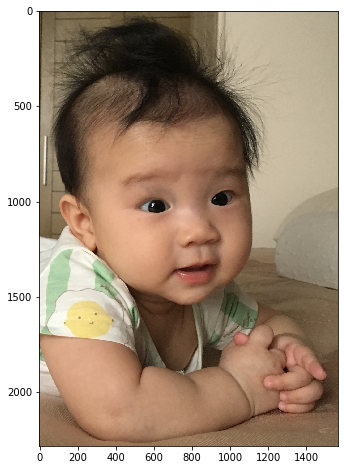

In [53]:
image = cv2.imread(iname)
plt.imshow(image[:,:,::-1])

In [54]:
image[0,0]

array([ 63,  89, 103], dtype=uint8)

In [55]:
image[0:10, 10:20]

array([[[47, 70, 85],
        [38, 61, 76],
        [26, 49, 64],
        [22, 45, 60],
        [21, 44, 59],
        [23, 46, 61],
        [36, 62, 76],
        [33, 59, 73],
        [35, 61, 75],
        [58, 84, 98]],

       [[40, 63, 78],
        [39, 62, 77],
        [32, 55, 70],
        [28, 51, 66],
        [27, 50, 65],
        [33, 56, 71],
        [34, 60, 74],
        [32, 58, 72],
        [36, 62, 76],
        [59, 85, 99]],

       [[33, 56, 71],
        [36, 59, 74],
        [33, 56, 71],
        [30, 53, 68],
        [29, 55, 69],
        [38, 64, 78],
        [37, 63, 77],
        [33, 59, 73],
        [34, 60, 74],
        [50, 76, 90]],

       [[30, 53, 68],
        [30, 53, 68],
        [27, 50, 65],
        [24, 47, 62],
        [23, 49, 63],
        [32, 58, 72],
        [39, 65, 79],
        [34, 60, 74],
        [34, 60, 74],
        [45, 71, 85]],

       [[34, 57, 72],
        [28, 51, 66],
        [21, 44, 59],
        [18, 41, 56],
        [15, 41, 55],
  

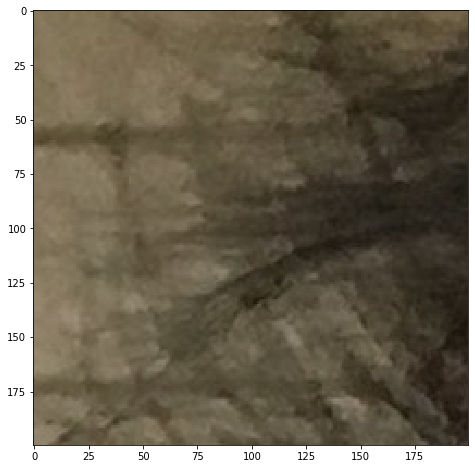

In [60]:
#crop image
crop = image[100:300, 100:300]
plt.imshow(crop[:,:,::-1])

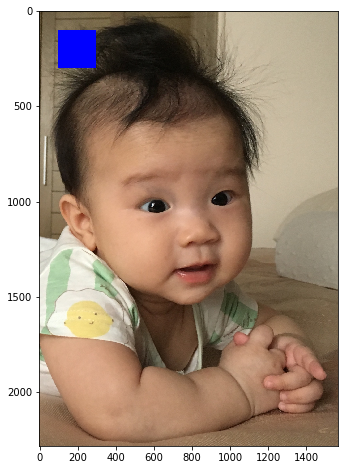

In [61]:
copy = image.copy()
copy[100:300, 100:300] = [255, 0, 0] #assign blue color
plt.imshow(copy[:,:,::-1])

# Resizing images

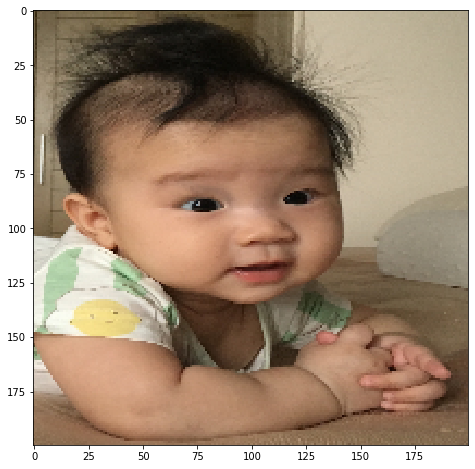

In [65]:
h, w = image.shape[:2]
resized = cv2.resize(image, (200, 200))
plt.imshow(resized[:,:,::-1])

In [68]:
#resize while keeping aspect ratio
new_w = 200
aspect_ratio = h/w
new_h = int(new_w*aspect_ratio)
print(new_h)

291


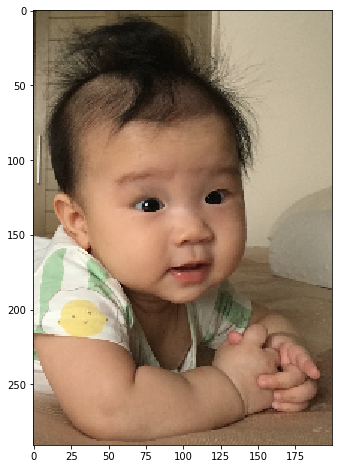

In [70]:
resized = cv2.resize(image, (new_w, new_h))
plt.imshow(resized[:,:,::-1])

# Write images

In [71]:
cv2.imwrite("resized_xu.jpg", resized)

True

In [72]:
!ls

resized_xu.jpg         xu_resized_128.jpg     xu_resized_512.jpg
w1_read_display.py     xu_resized_16.jpg      xu_resized_64.jpg
xu.jpg                 xu_resized_256.jpg     xu_sketch.jpg
xu_resized512_gray.jpg xu_resized_32.jpg
